# 장애인 및 비장애인 체력검정 데이터 분석

장애인 및 비장애인의 체력검정 데이터를 분석하고 차이를 발견해보는 것을 목표로 한다.
아울러 BMI등 다른 신체 지표 하나를 예측하고 이를 관리할 수 있는 운동이 어떻게 추천되고 있는지를 확인한다.
또한 비장애인의 데이터를 학습하여 장애인들의 고혈압을 사전에 관리할 수 있는 방안을 찾아보는 것이 목표이다.

In [1]:
path = 'C:/Users/USER/Desktop/Data_projects/Physical_fitness_project/'

In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

## 장애인 Data upload

장애인 data는 json 파일을 다뤄보기 위해, json을 선택하였다.

### Data가 어떻게 생겼는지 파악해보자.

In [3]:
with open(path + 'handicapped_202108.json', encoding='utf-8', mode='r') as f:
    array = json.load(f)

In [4]:
array[0]

{'mesure_tme': '2',
 'cnter_nm': '대구',
 'age_flag_nm': '성인',
 'mesure_place_flag_nm': '출장',
 'mesure_age_co': '26',
 'inpt_flag_nm': '관리자',
 'mesure_de': '20210804',
 'sexdstn_flag_cd': 'M',
 'trobl_ty_nm': '지적장애',
 'trobl_detail_nm': '',
 'trobl_grad_nm': '1등급',
 'mesure_iem_001_value': '107',
 'mesure_iem_002_value': '73',
 'mesure_iem_003_value': '178.1',
 'mesure_iem_004_value': '50.3',
 'mesure_iem_005_value': '15.9',
 'mesure_iem_006_value': '19.9',
 'mesure_iem_007_value': '',
 'mesure_iem_008_value': '',
 'mesure_iem_009_value': '',
 'mesure_iem_010_value': '',
 'mesure_iem_011_value': '',
 'mesure_iem_012_value': '',
 'mesure_iem_013_value': '',
 'mesure_iem_014_value': '',
 'mesure_iem_015_value': '',
 'mesure_iem_016_value': '',
 'mesure_iem_017_value': '0',
 'mesure_iem_018_value': '0',
 'mesure_iem_019_value': '',
 'mesure_iem_020_value': '',
 'mesure_iem_021_value': '',
 'mesure_iem_022_value': '4',
 'mesure_iem_023_value': '',
 'mesure_iem_024_value': '',
 'mesure_iem_02

깔끔하게 하나의 묶음으로 나오는 듯 하다. 따라서 무리없이 dataframe에 담아도 될 것이다.

In [5]:
handi_df = pd.read_json(path + 'handicapped_202108.json')

In [6]:
handi_df

,mesure_tme,cnter_nm,age_flag_nm,mesure_place_flag_nm,mesure_age_co,inpt_flag_nm,mesure_de,sexdstn_flag_cd,trobl_ty_nm,trobl_detail_nm,...,mesure_iem_021_value,mesure_iem_022_value,mesure_iem_023_value,mesure_iem_024_value,mesure_iem_025_value,mesure_iem_026_value,mesure_iem_027_value,mesure_iem_028_value,mesure_iem_029_value,mesure_iem_030_value
0,2,대구,성인,출장,26,관리자,20210804,M,지적장애,,...,,4,,,,53,79,,,-20
1,1,서울,청소년,일반,15,관리자,20210802,M,지적장애,,...,,36,,,,46.5,122,,,-7.1
2,5,전북,성인,일반,39,관리자,20210802,M,지적장애,,...,,18,,,,44.3,93,,,5
3,10,전북,성인,일반,40,관리자,20210802,M,지적장애,,...,,15,,,,38.2,103,,,-20
4,5,전북,성인,일반,38,관리자,20210802,M,지적장애,,...,,22,,,,37.3,112,,,-9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2,전북,성인,일반,26,관리자,20210806,F,지적장애,,...,,0,,,,40.1,82,,,12.2
125,2,전북,성인,일반,32,관리자,20210806,F,지적장애,,...,,17,,,,41.7,93,,,16.5
126,1,전북,성인,일반,50,관리자,20210806,F,지적장애,,...,,14,,,,36.2,82,,,-6.3
127,1,전북,성인,일반,33,관리자,20210806,F,지적장애,,...,,0,,,,38.3,86,,,5.8


다음과 같이 총 41개의 데이터로 이루어져있다. 이 중 필요한 정보를 찾아보자.

In [7]:
handi_df.trobl_ty_nm.unique()

array(['지적장애', '시각장애', '척수장애'], dtype=object)

다양한 장애의 종류가 있겠지만 여기서는 총 3가지 장애 관련 데이터만 존재한다.

In [8]:
handi_df.isna().sum()

mesure_tme              0
cnter_nm                0
age_flag_nm             0
mesure_place_flag_nm    0
mesure_age_co           0
inpt_flag_nm            0
mesure_de               0
sexdstn_flag_cd         0
trobl_ty_nm             0
trobl_detail_nm         0
trobl_grad_nm           0
mesure_iem_001_value    0
mesure_iem_002_value    0
mesure_iem_003_value    0
mesure_iem_004_value    0
mesure_iem_005_value    0
mesure_iem_006_value    0
mesure_iem_007_value    0
mesure_iem_008_value    0
mesure_iem_009_value    0
mesure_iem_010_value    0
mesure_iem_011_value    0
mesure_iem_012_value    0
mesure_iem_013_value    0
mesure_iem_014_value    0
mesure_iem_015_value    0
mesure_iem_016_value    0
mesure_iem_017_value    0
mesure_iem_018_value    0
mesure_iem_019_value    0
mesure_iem_020_value    0
mesure_iem_021_value    0
mesure_iem_022_value    0
mesure_iem_023_value    0
mesure_iem_024_value    0
mesure_iem_025_value    0
mesure_iem_026_value    0
mesure_iem_027_value    0
mesure_iem_0

결측치는 없다? 그럴리는 없는데.

In [9]:
handi_df.trobl_detail_nm.unique()

array(['', 'T6 미만'], dtype=object)

다음과 같이 결측치가 아니라 공백인 것들이 보인다.

우선 변수들의 의미를 다시 파악해보자.

- measure_time : 측정회차, cnter_nm : 센터명, inpt_flag_nm : 입력구분명
- age_flag_nm : 연령구분명(성인 등), mesure_age_co = 나이, measure_de : 측정일자
- trobl_ty_nm : 장애유형명, trobl_detail_nm : 장애상세명, trobl_grad_nm : 장애등급명
- measure_item 01  수축기혈압, 02 이완기 혈압,
- 3 키 4 체중 5 BMI 6 체지방율
- 7~15 : 피부두겹검사?
- 16 ~ 21 악력/암컬
- 22 ~ 30 : 운동검사

## 비장애 데이터 이해

이미 다른 py파일을 통해 공공 api를 통해 모든 데이터를 받아왔다.
이제 이 데이터를 분석해보자.

In [10]:
nonhandi_df = pd.read_csv(path + 'non_handi.csv', encoding = 'utf-8')

In [11]:
nonhandi_df.isna().sum()

Unnamed: 0       0
ageclass         0
agedegree        0
agegbn           0
certgbn          0
itemf001         0
itemf002         0
itemf003         0
itemf004         0
itemf005         0
itemf006         0
itemf007         0
itemf008         0
itemf009         0
itemf010         0
itemf012         0
itemf013         0
itemf014         0
itemf015         0
itemf016         0
itemf017         0
itemf018         0
itemf019         0
itemf020         0
itemf021         0
itemf022         0
itemf023         0
itemf024         0
itemf025         0
itemf026         0
itemf027         0
itemf028         0
itemf030         0
itemf031         0
itemf032         0
itemf033         0
itemf034         0
itemf035         0
itemf036         0
itemf037         0
itemf038         0
itemf039         0
itemf040         0
itemf041         0
presnote      6544
testym           0
dtype: int64

In [12]:
nonhandi_df = nonhandi_df.drop('Unnamed: 0', axis = 1)

In [13]:
nonhandi_df.agedegree.unique()

array([15, 14, 13, 19, 62, 66, 47, 73, 53, 60, 22, 77, 44, 70, 56, 20, 57,
       59, 40, 43, 33, 54, 21, 69, 31, 52, 51, 24, 28, 32, 18, 38, 25, 34,
       23, 26, 16, 61, 67, 35, 72, 42, 27, 48, 29, 75, 64, 79, 50, 55, 90,
       46, 74, 76, 41, 63, 49, 65, 71, 82, 80, 30, 58, 37, 68, 84, 78, 45,
       36, 39, 83, 81, 88, 86, 85, 93, 17, 87, 92, 89, 94, 91, 96],
      dtype=int64)

우선 간단하게 성연령 그래프를 그려보자.

In [14]:
nonhandi_df.agegbn

0        청소년
1        청소년
2        청소년
3        청소년
4        청소년
        ... 
29929     성인
29930    청소년
29931    청소년
29932     성인
29933     노인
Name: agegbn, Length: 29934, dtype: object

In [15]:
nonhandi_df

,ageclass,agedegree,agegbn,certgbn,itemf001,itemf002,itemf003,itemf004,itemf005,itemf006,...,itemf034,itemf035,itemf036,itemf037,itemf038,itemf039,itemf040,itemf041,presnote,testym
0,10,15,청소년,참가증,169.9,54.7,26.1,-,72.0,113.0,...,-,-,-,-,-,-,-,-,"본운동:한발 연속 뛰기,전후 교차 뛰기,사이드 지그재그 뛰기,순간반응 콘 찍기,순간...",201911
1,10,14,청소년,3등급,161.3,52.3,32.7,-,73.0,108.0,...,-,-,-,-,-,-,-,-,"본운동:거꾸로 누워서 밀기,앉아서 모으기,앉아서 위로 밀기,바벨들어올리기,원판던지기...",201911
2,10,14,청소년,3등급,162.5,56.2,26.1,-,70.0,104.0,...,-,-,-,-,-,-,-,-,"본운동:회전 초승달 자세,합장하여 앞으로 숙이기,레그 스윙,전진 점프하며 발 뒤꿈치...",201911
3,10,14,청소년,3등급,160.6,58.6,37.3,-,63.0,109.0,...,-,-,-,-,-,-,-,-,"본운동:한발 연속 뛰기,전후 교차 뛰기,사이드 지그재그 뛰기,순간반응 콘 찍기,순간...",201911
4,10,13,청소년,1등급,167.5,55.7,23.4,-,77.0,116.0,...,-,-,-,-,-,-,-,-,"본운동:양팔 벌려 높이 뛰기,바운딩 운동 루틴프로그램,박스 운동 루틴프로그램,사...",201911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29929,20,26,성인,참가증,163.6,54.2,28.9,76.1,87.0,135.0,...,-,38.6,-,-,-,-,-,-,"본운동:윗몸올리기 ,엎드려 버티기,누워서 다리 들어올리기,누워서 엉덩이 들어올리기,...",201911
29930,10,15,청소년,1등급,177.8,67.7,7.8,74.4,68.0,85.0,...,-,-,-,-,-,-,-,-,NaN,201911
29931,10,15,청소년,2등급,178.5,52.3,10.9,65,66.0,107.0,...,-,-,-,-,-,-,-,-,NaN,201911
29932,30,38,성인,2등급,164.0,57.8,27.6,79.6,74.0,138.0,...,-,-,-,-,-,-,-,-,"준비운동:앉았다 일어서기,윗몸올리기 ,엎드려 버티기,누워서 하늘 자전거 / 본운동:...",201911


먼저 변수들의 의미를 다시 정리해보자.

- ageclass : 연령대, ageDegree : 나이, ageGbn : 나이 구분
- certGbn : 체력급수
- itemf001 : 신장 itemf002 : 체중 itemf003 : 체지방률  itemf004 : 허리둘레, itemf005 :  이완기혈압, itemf006 : 수축기혈압
- itemf007 ~ itemf041 운동평가 기록.  단, itemf 018은 bmi
- presnote : 운동처방
- testYm : 측정년월

수많은 알 수 없는 운동들이 많아, 대표적으로 익숙한 운동들만 선별하여 확인하고자 한다.

목표 : 비장애인 데이터를 바탕으로 하여 장애인들에게 그들이 가능한 운동/생활습관 관련 지표를 만들어주고자 하는 것이 목표이다.

우선적으로 생각해볼 수 있는 질문은 다음과 같다.
- 고혈압에는 어떤 지표들이 영향을 줄까? (연령, 체지방, 체력 상황 등에 대한 비교)
- 고혈압에 대한 예측을 통해 
- 그들이 할 수 있는 운동은 무엇인가? 어떤 운동을 처방받았고 어떤 것을 권장해야 하는가?

이를 위해서는 장애인 데이터에도 있는 운동을 고려해야 한다.

### 두 데이터의 통합

필요 변수가 될만한 내용을 정리해보자.
아쉽게도 여성 성별구분이 비장애인 데이터에 없어 남/녀 차이의 반응이 어렵다.
따라서 남녀 차이가 매우 클 악력 변수는 제외하고 기타 익숙하지 않은 정보는 제외하고 나머지 익숙한 종목들과
왕복오래달리기의 경우는 장애인은 무리이므로 장애인은 5분달리기로 평가한다.

- 개인프로필 : 나이, 나이구분
  - 장애인 추가 : 장애 종류 관련 데이터 추가
- 개인 건강 데이터 : 키, 몸무게, 체지방율, BMI, 최저혈압, 최고혈압
- 개인 체력 데이터 : 윗몸말아올리기, 윗몸앞으로굽히기, 6분걷기, 스텝검사, 스텝검사회복시 심박수
  - 장애인 추가 : 휠체어5분달리기, 
  - 비장애인 추가 : 왕복오래달리기, 제자리멀리뛰기

In [16]:
non_handi_data = nonhandi_df[['agedegree', 'agegbn', 'itemf001', 'itemf002', 'itemf003', 'itemf018', 'itemf005', 'itemf006',
                              'itemf009', 'itemf012', 'itemf024', 'itemf037', 'itemf036', 'itemf020', 'itemf022']]

In [17]:
non_handi_data.columns = ['age', 'agegroup', 'height', 'weight', 'fat_rate', 'bmi', 'low_pressure', 'high_pressure',
                          'sit_up', 'stretch_upper', 'walking_6m', 'step', 'step_recovery', 'shuttle_run', 'long_jump']

In [18]:
non_handi_data.head(2)

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-


In [19]:
handi_df

,mesure_tme,cnter_nm,age_flag_nm,mesure_place_flag_nm,mesure_age_co,inpt_flag_nm,mesure_de,sexdstn_flag_cd,trobl_ty_nm,trobl_detail_nm,...,mesure_iem_021_value,mesure_iem_022_value,mesure_iem_023_value,mesure_iem_024_value,mesure_iem_025_value,mesure_iem_026_value,mesure_iem_027_value,mesure_iem_028_value,mesure_iem_029_value,mesure_iem_030_value
0,2,대구,성인,출장,26,관리자,20210804,M,지적장애,,...,,4,,,,53,79,,,-20
1,1,서울,청소년,일반,15,관리자,20210802,M,지적장애,,...,,36,,,,46.5,122,,,-7.1
2,5,전북,성인,일반,39,관리자,20210802,M,지적장애,,...,,18,,,,44.3,93,,,5
3,10,전북,성인,일반,40,관리자,20210802,M,지적장애,,...,,15,,,,38.2,103,,,-20
4,5,전북,성인,일반,38,관리자,20210802,M,지적장애,,...,,22,,,,37.3,112,,,-9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2,전북,성인,일반,26,관리자,20210806,F,지적장애,,...,,0,,,,40.1,82,,,12.2
125,2,전북,성인,일반,32,관리자,20210806,F,지적장애,,...,,17,,,,41.7,93,,,16.5
126,1,전북,성인,일반,50,관리자,20210806,F,지적장애,,...,,14,,,,36.2,82,,,-6.3
127,1,전북,성인,일반,33,관리자,20210806,F,지적장애,,...,,0,,,,38.3,86,,,5.8


In [20]:
handi_data = handi_df[['mesure_age_co', 'age_flag_nm', 'trobl_ty_nm', 'trobl_grad_nm', 'mesure_iem_003_value',
                       'mesure_iem_003_value', 'mesure_iem_006_value', 'mesure_iem_005_value',
                       'mesure_iem_002_value', 'mesure_iem_001_value', 'mesure_iem_022_value', 'mesure_iem_030_value',
                       'mesure_iem_025_value', 'mesure_iem_026_value', 'mesure_iem_027_value', 'mesure_iem_023_value']]

In [21]:
handi_data.columns = ['age', 'agegroup', 'handi_type', 'handi_rank', 
                      'height', 'weight', 'fat_rate', 'bmi', 'low_pressure', 'high_pressure',
                      'sit_up', 'stretch_upper', 'walking_6m', 'step', 'step_recovery', 'wheelchair_run_5m']

In [22]:
handi_data

,age,agegroup,handi_type,handi_rank,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,wheelchair_run_5m
0,26,성인,지적장애,1등급,178.1,178.1,19.9,15.9,73,107,4,-20,,53,79,
1,15,청소년,지적장애,3등급,166.4,166.4,24.8,25.0,60,126,36,-7.1,,46.5,122,
2,39,성인,지적장애,2등급,167.8,167.8,30.0,23.7,76,112,18,5,,44.3,93,
3,40,성인,지적장애,1등급,184.6,184.6,31.1,32.2,67,133,15,-20,,38.2,103,
4,38,성인,지적장애,2등급,167.8,167.8,35.7,32.5,86,152,22,-9.2,,37.3,112,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,26,성인,지적장애,2등급,148.3,148.3,30.2,24.1,63,99,0,12.2,,40.1,82,
125,32,성인,지적장애,2등급,153.3,153.3,24.1,16.6,74,110,17,16.5,,41.7,93,
126,50,성인,지적장애,1등급,160.8,160.8,31.5,22.5,54,102,14,-6.3,,36.2,82,
127,33,성인,지적장애,2등급,139.2,139.2,42.9,24.0,87,151,0,5.8,,38.3,86,


다음과같이 변수 명을 통일시켜 데이터를 모두 구축하였다.
이제 이를 바탕으로 본격적인 결측치 처리 등을 진행하고자 한다.

In [23]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,-,10,-,-,-,35,-
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,-,9,-,-,-,39,-
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,-,25,-,-,-,41,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29929,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-,-3.6,-,-,-,-,142
29930,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,-,23,-,-,-,73,-
29931,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,-,8,-,-,-,68,-
29932,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,-,18.4,-,-,-,31,193


### 데이터 전처리 / EDA

In [24]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### age

In [25]:
non_handi_data.age.unique()

array([15, 14, 13, 19, 62, 66, 47, 73, 53, 60, 22, 77, 44, 70, 56, 20, 57,
       59, 40, 43, 33, 54, 21, 69, 31, 52, 51, 24, 28, 32, 18, 38, 25, 34,
       23, 26, 16, 61, 67, 35, 72, 42, 27, 48, 29, 75, 64, 79, 50, 55, 90,
       46, 74, 76, 41, 63, 49, 65, 71, 82, 80, 30, 58, 37, 68, 84, 78, 45,
       36, 39, 83, 81, 88, 86, 85, 93, 17, 87, 92, 89, 94, 91, 96],
      dtype=int64)

나이 데이터에서 오류는 없어보인다. 90대가 이걸 하는게 좀 신기하지만..

<AxesSubplot:xlabel='age', ylabel='Count'>

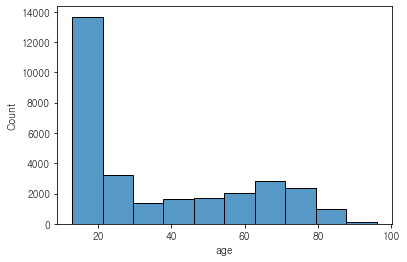

In [26]:
sns.histplot(x = 'age', data = non_handi_data, bins = 10)

체력검정을 받은 사람들의 대부분이 10대~20대임을 알 수 있다. 특히 10대가 절대 다수임을 알 수 있다.

#### agegroup

In [27]:
non_handi_data.agegroup.unique()

array(['청소년', '성인', '노인'], dtype=object)

3가지 집단으로 나뉘어져있다. 청소년이 가장 많겠지만, 시각화를 통해 확인해보자.

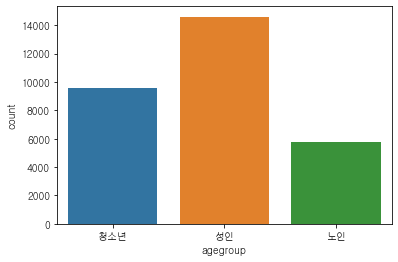

In [28]:
sns.countplot(x = 'agegroup', data = non_handi_data)
plt.show()

? 청소년보다는 성인이 더 많다..! 20대 극초반이 더 많겠구나를 알 수 있다.
추후 정합성 검정을 실시해보자.

In [29]:
sorted(non_handi_data.height.unique())

[17.6,
 19.0,
 120.0,
 128.0,
 130.0,
 130.5,
 130.8,
 132.2,
 133.0,
 134.1,
 134.5,
 135.3,
 135.7,
 136.1,
 136.2,
 136.7,
 137.0,
 137.1,
 137.3,
 137.5,
 137.7,
 137.8,
 137.9,
 138.0,
 138.3,
 138.4,
 138.5,
 138.7,
 138.8,
 138.9,
 139.0,
 139.2,
 139.3,
 139.4,
 139.5,
 139.6,
 139.8,
 139.9,
 140.0,
 140.1,
 140.2,
 140.3,
 140.4,
 140.5,
 140.6,
 140.7,
 140.8,
 140.9,
 141.0,
 141.1,
 141.2,
 141.3,
 141.4,
 141.5,
 141.6,
 141.7,
 141.8,
 141.9,
 142.0,
 142.1,
 142.2,
 142.3,
 142.4,
 142.5,
 142.6,
 142.7,
 142.8,
 142.9,
 143.0,
 143.1,
 143.2,
 143.3,
 143.4,
 143.5,
 143.6,
 143.7,
 143.8,
 143.9,
 144.0,
 144.1,
 144.2,
 144.3,
 144.4,
 144.5,
 144.6,
 144.7,
 144.8,
 144.9,
 145.0,
 145.1,
 145.2,
 145.3,
 145.4,
 145.5,
 145.6,
 145.7,
 145.8,
 145.9,
 146.0,
 146.1,
 146.2,
 146.3,
 146.4,
 146.5,
 146.6,
 146.7,
 146.8,
 146.9,
 147.0,
 147.1,
 147.2,
 147.3,
 147.4,
 147.5,
 147.6,
 147.7,
 147.8,
 147.9,
 148.0,
 148.1,
 148.2,
 148.3,
 148.4,
 148.5,
 148.6,
 1

이상한 값이 몇개 보인다. 이들은 잘못된 데이터일 것이다. 키가 50이하거나 250 이상은 비정상이다..아무리봐도

In [30]:
sorted(non_handi_data.weight.unique(), reverse = True)

[703.8,
 155.1,
 148.0,
 146.8,
 146.7,
 142.7,
 140.5,
 140.0,
 138.5,
 133.2,
 132.9,
 132.6,
 130.3,
 130.2,
 130.1,
 130.0,
 128.1,
 126.9,
 126.3,
 125.8,
 125.7,
 125.4,
 125.0,
 124.7,
 124.5,
 124.0,
 123.4,
 122.4,
 122.3,
 121.9,
 121.7,
 121.4,
 121.3,
 120.9,
 120.7,
 120.1,
 119.8,
 119.7,
 119.6,
 119.2,
 119.1,
 118.8,
 118.6,
 118.3,
 118.0,
 117.5,
 117.0,
 116.9,
 116.8,
 116.7,
 116.5,
 116.3,
 116.1,
 115.9,
 115.8,
 115.6,
 115.5,
 115.4,
 115.3,
 115.1,
 114.6,
 114.2,
 114.0,
 113.9,
 113.7,
 113.1,
 113.0,
 112.9,
 112.7,
 112.6,
 112.5,
 112.4,
 112.3,
 112.2,
 112.1,
 112.0,
 111.9,
 111.6,
 111.4,
 111.3,
 111.2,
 111.0,
 110.9,
 110.8,
 110.7,
 110.6,
 110.5,
 110.4,
 110.3,
 110.2,
 110.1,
 110.0,
 109.9,
 109.8,
 109.7,
 109.6,
 109.5,
 109.4,
 109.3,
 109.2,
 109.0,
 108.9,
 108.8,
 108.7,
 108.6,
 108.4,
 108.2,
 108.1,
 107.9,
 107.8,
 107.7,
 107.64,
 107.6,
 107.5,
 107.26,
 107.2,
 107.16,
 107.1,
 107.0,
 106.9,
 106.8,
 106.7,
 106.6,
 106.5,
 106.

비만환자라 150kg이넘어갈수는 있어도... 703kg은 존재할 수 없는 무게이다. 이를 제외하자.

In [31]:
drop_idx = non_handi_data.loc[(non_handi_data.height < 50) | 
                              (non_handi_data.height > 250)|
                              (non_handi_data.weight > 200)].index

In [32]:
drop_idx

Int64Index([3887, 6243, 14002, 28223, 28851], dtype='int64')

총 5건의 데이터가 키와 몸무게에 대해서 오류 데이터로 판정되었다. 이를 지우고 진행한다.

In [33]:
non_handi_data = non_handi_data.drop(index = drop_idx, axis = 0).reset_index(drop = True)

In [34]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,-,10,-,-,-,35,-
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,-,9,-,-,-,39,-
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,-,25,-,-,-,41,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29924,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-,-3.6,-,-,-,-,142
29925,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,-,23,-,-,-,73,-
29926,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,-,8,-,-,-,68,-
29927,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,-,18.4,-,-,-,31,193


키와 몸무게간의 상관관계를 확인해보자.

<AxesSubplot:xlabel='height', ylabel='weight'>

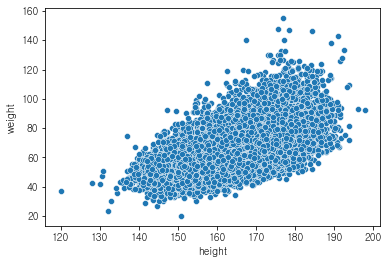

In [35]:
sns.scatterplot(x = 'height', y = 'weight', data = non_handi_data)

몇몇 예외 케이스들이 보이지만 전체적으로는 우상향 형태를 보인다. 큰 Outlier들이 보이지는 않아 제외해야할 값들이 잘 제외되었음을 알 수 있다.

#### fat rate & bmi

이들 값에 오류가 없나 보자.

In [36]:
sorted(non_handi_data.fat_rate.unique(), reverse = True)

[403.0,
 358.0,
 344.4,
 187.0,
 158.0,
 65.4,
 57.4,
 55.2,
 54.4,
 53.9,
 53.7,
 53.4,
 53.3,
 53.1,
 52.8,
 52.6,
 52.4,
 52.2,
 52.0,
 51.8,
 51.7,
 51.6,
 51.5,
 51.4,
 51.3,
 51.2,
 51.1,
 51.0,
 50.9,
 50.8,
 50.7,
 50.6,
 50.4,
 50.3,
 50.2,
 50.1,
 50.0,
 49.9,
 49.8,
 49.7,
 49.6,
 49.5,
 49.4,
 49.3,
 49.2,
 49.1,
 49.0,
 48.9,
 48.8,
 48.7,
 48.6,
 48.5,
 48.4,
 48.3,
 48.2,
 48.1,
 48.0,
 47.9,
 47.8,
 47.7,
 47.6,
 47.5,
 47.4,
 47.3,
 47.2,
 47.1,
 47.0,
 46.9,
 46.8,
 46.7,
 46.6,
 46.5,
 46.4,
 46.3,
 46.20569,
 46.2,
 46.1,
 46.0,
 45.9,
 45.8,
 45.7,
 45.6,
 45.5,
 45.4,
 45.3,
 45.2,
 45.1,
 45.0,
 44.9,
 44.8,
 44.7,
 44.6,
 44.5,
 44.4,
 44.3,
 44.2,
 44.1,
 44.0,
 43.9,
 43.8,
 43.7,
 43.6,
 43.5,
 43.4,
 43.3,
 43.2,
 43.1,
 43.0,
 42.9,
 42.882,
 42.8,
 42.7,
 42.6,
 42.5,
 42.4,
 42.3,
 42.2,
 42.1,
 42.0,
 41.9,
 41.8,
 41.7,
 41.6,
 41.5,
 41.4,
 41.3,
 41.2,
 41.1,
 41.0,
 40.9,
 40.8,
 40.7,
 40.6,
 40.5,
 40.4,
 40.30057,
 40.3,
 40.2,
 40.1,
 40.0,
 39.9

체지방율이 100% 이상이 나올수가 있나?

체지방율은 100퍼 이상일 수 없다. 이것은 오류 데이터로 추정된다.

In [37]:
sorted(non_handi_data.bmi.unique(), reverse = True)

[50.1,
 49.5,
 48.0,
 46.1,
 44.9,
 44.6,
 44.5,
 43.4,
 43.1,
 42.8,
 42.7,
 42.3,
 42.1,
 42.0,
 41.5,
 41.3,
 41.2,
 40.9,
 40.7,
 40.6,
 40.5,
 40.4,
 40.3,
 40.2,
 40.1,
 40.0,
 39.9,
 39.8,
 39.7,
 39.5,
 39.3,
 39.2,
 39.1,
 39.0,
 38.9,
 38.7,
 38.6,
 38.5,
 38.4,
 38.3,
 38.1,
 38.0,
 37.9,
 37.8,
 37.7,
 37.5,
 37.4,
 37.3,
 37.2,
 37.1,
 37.0,
 36.9,
 36.8,
 36.7,
 36.6,
 36.5,
 36.4,
 36.3,
 36.2,
 36.1,
 36.0,
 35.9,
 35.8,
 35.7,
 35.6,
 35.5,
 35.4,
 35.3,
 35.2,
 35.1,
 35.0,
 34.9,
 34.8,
 34.7,
 34.6,
 34.5,
 34.4,
 34.3,
 34.2,
 34.1,
 34.0,
 33.9,
 33.8,
 33.7,
 33.6,
 33.5,
 33.4,
 33.3,
 33.2,
 33.1,
 33.0,
 32.9,
 32.8,
 32.7,
 32.6,
 32.5,
 32.4,
 32.3,
 32.2,
 32.1,
 32.0,
 31.9,
 31.8,
 31.7,
 31.6,
 31.5,
 31.4,
 31.3,
 31.2,
 31.1,
 31.0,
 30.9,
 30.8,
 30.7,
 30.6,
 30.5,
 30.4,
 30.3,
 30.2,
 30.1,
 30.0,
 29.9,
 29.8,
 29.7,
 29.6,
 29.5,
 29.4,
 29.3,
 29.2,
 29.1,
 29.0,
 28.9,
 28.8,
 28.7,
 28.6,
 28.5,
 28.4,
 28.3,
 28.2,
 28.1,
 28.0,
 27.9,
 27.8,

bmi가 폭탄인 분들이 많아보인다.... 아무튼 그래도 존재할 수 있는 범위이므로 일단 사용해보기로 한다.

체지방율이 오류인 데이터를 제외한다.

In [38]:
drop_idx = non_handi_data.loc[(non_handi_data.fat_rate >= 100)].index
non_handi_data = non_handi_data.drop(index = drop_idx, axis = 0).reset_index(drop = True)

#### pressure data

먼저 high low가 바뀐 케이스가 있나 보자.

몇몇 바뀐 비정상 데이터가 보인다... 이거부터 해결하고 처리하자..
두개의 값을 바꿔주자.

In [39]:
change_idx = non_handi_data.loc[non_handi_data.low_pressure >= non_handi_data.high_pressure].index
for i in range(len(non_handi_data)):
    if i in change_idx:
        non_handi_data.low_pressure[i], non_handi_data.high_pressure[i] = non_handi_data.high_pressure[i], non_handi_data.low_pressure[i]

<ipython-input-39-995913cdeb00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_handi_data.low_pressure[i], non_handi_data.high_pressure[i] = non_handi_data.high_pressure[i], non_handi_data.low_pressure[i]


In [40]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,-,10,-,-,-,35,-
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,-,9,-,-,-,39,-
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,-,25,-,-,-,41,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29919,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-,-3.6,-,-,-,-,142
29920,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,-,23,-,-,-,73,-
29921,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,-,8,-,-,-,68,-
29922,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,-,18.4,-,-,-,31,193


혈압 데이터가 비정상급인 데이터를 없애보자.

In [41]:
sorted(non_handi_data.low_pressure.unique())

[2.0,
 7.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 17.0,
 20.0,
 24.8,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 61.7,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 69.1,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 74.6,
 75.0,
 76.0,
 77.0,
 77.2,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 84.6,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 111.0,
 113.0,
 114.0,
 115.0,
 117.0,
 119.0,
 122.0,
 172.9]

최저 혈압이 170이라던가, 30 이하는 너무 말도 안되는 수치인다...

In [42]:
sorted(non_handi_data.high_pressure.unique())

[27.3,
 65.0,
 67.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 170.0,
 171.3,
 172.0,
 173.0,
 174.0,
 176.0,
 177.0,
 178.0,
 179.0,
 180.0,
 181.0,
 182.0,
 189.0,
 191.0,
 207.0,
 1127.0,
 1378.0,
 1382.0,
 3132.0,
 5109.0,
 11073.0]

최고 혈압 역시 1000단위면 사람이 이미 죽었을 것이다... 말도 안된다.
또한 70 미만도 말이 안된다...

In [43]:
drop_idx = non_handi_data.loc[(non_handi_data.low_pressure <= 30)|
                              (non_handi_data.low_pressure >= 170)|
                              (non_handi_data.high_pressure < 70)|
                              (non_handi_data.high_pressure > 1000)].index
non_handi_data = non_handi_data.drop(index = drop_idx, axis = 0).reset_index(drop = True)

In [44]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,-,10,-,-,-,35,-
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,-,9,-,-,-,39,-
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,-,25,-,-,-,41,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29902,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-,-3.6,-,-,-,-,142
29903,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,-,23,-,-,-,73,-
29904,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,-,8,-,-,-,68,-
29905,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,-,18.4,-,-,-,31,193


13명 정도가 유효하지 않았음을 알 수 있다..

최저 혈압과 최고 혈압의 관계를 살펴보자.

<AxesSubplot:xlabel='low_pressure', ylabel='high_pressure'>

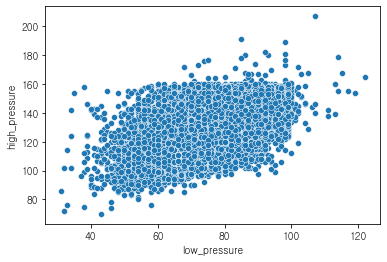

In [45]:
sns.scatterplot(x = 'low_pressure', y = 'high_pressure', data = non_handi_data)

최저혈압과 상관없이, 일반적으로는 최고 혈압이 높아봐야 160정도에 머무르는 경우가 대다수임을 알 수 있다.

체내 지방이랑 최고혈압의 관계를 살펴보자, 즉 비만이 정말 혈압에 영향을 미치나 보자.

<AxesSubplot:xlabel='fat_rate', ylabel='high_pressure'>

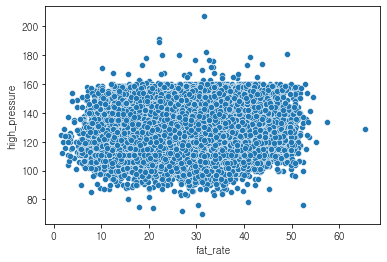

In [46]:
sns.scatterplot(x = 'fat_rate', y = 'high_pressure', data = non_handi_data)

의외로 혈압과의 관계는 보이지 않다. BMI랑의 관계도 살펴보자.

<AxesSubplot:xlabel='bmi', ylabel='high_pressure'>

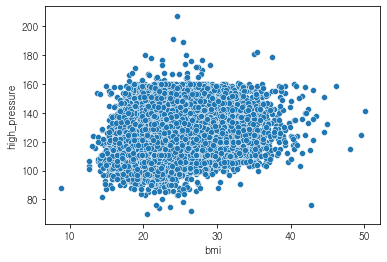

In [47]:
sns.scatterplot(x = 'bmi', y = 'high_pressure', data = non_handi_data)

bmi와도 생각보다 유의미하지는 않다.

#### 체력 지표에 대한 전처리

이제 문제이다. 체력 지표의 경우는 쓸 수 있는 데이터가 많지 않다.

In [48]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,sit_up,stretch_upper,walking_6m,step,step_recovery,shuttle_run,long_jump
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,-,19,-,-,-,31,-
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,-,18.5,-,-,-,38,-
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,-,10,-,-,-,35,-
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,-,9,-,-,-,39,-
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,-,25,-,-,-,41,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29902,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-,-3.6,-,-,-,-,142
29903,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,-,23,-,-,-,73,-
29904,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,-,8,-,-,-,68,-
29905,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,-,18.4,-,-,-,31,193


In [49]:
non_handi_data.sit_up.unique()

array(['-', '51', '80', '44', '28', '31', '57', '26', '20', '64', '23',
       '27', '30', '55', '63', '42', '32', '47', '61', '41', '49', '21',
       '60', '7', '50', '40', '10', '37', '36', '53', '46', '59', '33',
       '43', '67', '13', '34', '38', '62', '22', '14', '66', '56', '54',
       '19', '35', '76', '75', '73', '45', '12', '24', '25', '29', '17',
       '58', '15', '4', '6', '11', '5', '16', '18', '70', '52', '39',
       '65', '90', '9', '48', '0', '2', '69', '8', '1', '71', '68', '3',
       '72', '79', '74', '77', '130', '102', '85', '119', '109', '96',
       '118', '125', '140', '120', '132', '150', '141', '142', '123',
       '105', '111', '126', '101', '110', '122', '81', '112', '107', '92',
       '100', '104', '113', '86', '103', '82', '88', '78', '135', '83',
       '91', '93', '106', '.5', '94', '87', '95', '128', '97', '84'],
      dtype=object)

우선 '-' 이라는 값이 보인다. 음의 값들이 보이지는 않지만 .5같은 말도 안되는 값도 보인다.

In [68]:
def is_number(num):
    try:
        float(num)
        return True #num을 float으로 변환할 수 있는 경우
    except ValueError: #num을 float으로 변환할 수 없는 경우
        return False

In [69]:
exercise = non_handi_data.columns[8:]
for col in exercise:
    non_numeric = []
    for i in range(len(non_handi_data)):
        if not is_number(str(non_handi_data[col][i])):
            non_numeric.append((non_handi_data[col][i]))
    print(col)
    print(set(non_numeric))

sit_up
{'-'}
stretch_upper
{'-'}
walking_6m
{'-'}
step
{'-'}
step_recovery
{'-'}
shuttle_run
{'-'}
long_jump
{'-'}


7개의 영역에 대해 모두 '-'가 빈칸으로 대체되어있음을 알 수 있다.
즉 해당 영역에 대해 실시하지 않았구나 생각할 수 있다.

In [ ]:
non

In [74]:
for col in exercise:
    print(col)
    print(non_handi_data[col].value_counts()['-'])

sit_up
25693
stretch_upper
68
walking_6m
29743
step
28141
step_recovery
28141
shuttle_run
8694
long_jump
13549


29907명 정도가 응시했는데 대부분의 데이터가 없다면 사용하기 어려울 것이다.
따라서 사용가능한 데이터는 끽해야 
- 앉아윗몸앞으로 굽히기
- 셔틀런
- 제자리멀리뛰기

정도로 보인다... 생각보다 많은 종목을 모두가 응시하지는 않는 것으로 보인다...

In [78]:
# 사용하지 않을 열을 지우고 '-'로는 결측치임을 알기 어려워 결측처리한다.
non_handi_data = non_handi_data.drop(['sit_up', 'walking_6m', 'step', 'step_recovery'], axis = 1).replace('-', np.nan)

In [82]:
non_handi_data.dtypes

age                int64
agegroup          object
height           float64
weight           float64
fat_rate         float64
bmi              float64
low_pressure     float64
high_pressure    float64
stretch_upper     object
shuttle_run       object
long_jump         object
dtype: object

결측치 처리를 다음과 같이 할 수 있을 것이다.  
(1) 연령대를 계산후, 연령대별 평균을 낸다.
(2) 그냥 전체 평균을 낸다.

In [84]:
print(non_handi_data.age.min())
print(non_handi_data.age.max())

13
96


In [85]:
def get_gen(age):
    return str(age//10 * 10) + 's'

In [86]:
non_handi_data['gen'] = non_handi_data.age.apply(lambda x : get_gen(x))

In [88]:
non_handi_data

,age,agegroup,height,weight,fat_rate,bmi,low_pressure,high_pressure,stretch_upper,shuttle_run,long_jump,gen
0,15,청소년,169.9,54.7,26.1,18.9,72.0,113.0,19,31,NaN,10s
1,14,청소년,161.3,52.3,32.7,20.1,73.0,108.0,18.5,38,NaN,10s
2,14,청소년,162.5,56.2,26.1,21.3,70.0,104.0,10,35,NaN,10s
3,14,청소년,160.6,58.6,37.3,22.7,63.0,109.0,9,39,NaN,10s
4,13,청소년,167.5,55.7,23.4,19.9,77.0,116.0,25,41,NaN,10s
...,...,...,...,...,...,...,...,...,...,...,...,...
29902,26,성인,163.6,54.2,28.9,20.3,87.0,135.0,-3.6,NaN,142,20s
29903,15,청소년,177.8,67.7,7.8,21.4,68.0,85.0,23,73,NaN,10s
29904,15,청소년,178.5,52.3,10.9,16.4,66.0,107.0,8,68,NaN,10s
29905,38,성인,164.0,57.8,27.6,21.5,74.0,138.0,18.4,31,193,30s


어떤 방식으로 결측치를 계산할지에 대해서는 그래프를 그려 계산해 봐야 할 것이다...

In [92]:
non_handi_data['stretch_upper'] = non_handi_data.stretch_upper.apply(lambda x : float(x))
non_handi_data['shuttle_run'] = non_handi_data.shuttle_run.apply(lambda x : float(x))
non_handi_data['long_jump'] = non_handi_data.long_jump.apply(lambda x : float(x))

<AxesSubplot:xlabel='gen', ylabel='stretch_upper'>

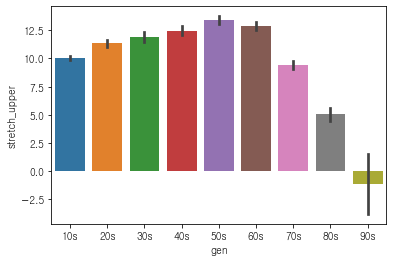

In [101]:
sns.barplot(x = 'gen', y = 'stretch_upper', data = non_handi_data,
           order = sorted(non_handi_data.gen.unique()))

<AxesSubplot:xlabel='gen', ylabel='shuttle_run'>

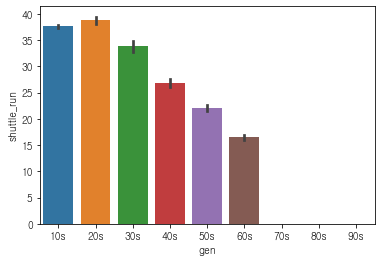

In [102]:
sns.barplot(x = 'gen', y = 'shuttle_run', data = non_handi_data,
           order = sorted(non_handi_data.gen.unique()))

<AxesSubplot:xlabel='gen', ylabel='long_jump'>

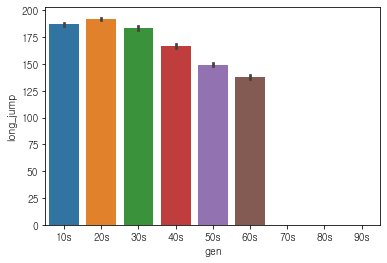

In [103]:
sns.barplot(x = 'gen', y = 'long_jump', data = non_handi_data,
           order = sorted(non_handi_data.gen.unique()))